<a href="https://colab.research.google.com/github/nupoor-ka/ES114-PSDV/blob/main/Histogram_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###LAB ASSIGNMENT 5 - HISTOGRAM MATCHING

##CODE

IMPORTING REQUIRED LIBRARIES

In [ ]:
import numpy as np
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import cv2

READING IMAGES

In [ ]:
img_musk = cv2.imread("/content/drive/MyDrive/Classroom/ES 114 Probability, Statistics, and Data Visualization/Dataset(2)/histogram_matching/grey_4.png", 0)
img_panda = cv2.imread("/content/drive/MyDrive/Classroom/ES 114 Probability, Statistics, and Data Visualization/Dataset(2)/histogram_matching/grey_1.png", 0)
img_town = cv2.imread("/content/drive/MyDrive/Classroom/ES 114 Probability, Statistics, and Data Visualization/Dataset(2)/histogram_matching/grey_3.png", 0)
img_woman = cv2.imread("/content/drive/MyDrive/Classroom/ES 114 Probability, Statistics, and Data Visualization/Dataset(2)/histogram_matching/grey_2.png", 0)
img_a = cv2.imread("/content/drive/MyDrive/Classroom/ES 114 Probability, Statistics, and Data Visualization/sample_results/sample_results/imageA.png", 0)
img_b = cv2.imread("/content/drive/MyDrive/Classroom/ES 114 Probability, Statistics, and Data Visualization/sample_results/sample_results/imageB.png", 0)

EQUALISING IMAGES

In [ ]:
ints = np.arange(0, 256, dtype = float)

def pix_intensity(image):
  (rows, cols) = (image.shape[0],image.shape[1])
  pixs = np.zeros(256)
  for i in range(rows):
    for j in range(cols):
      pixs[image[i][j]]+=1
  return pixs

In [ ]:
def equalize_hist(image_name):
  numpix = pix_intensity(image_name)
  total = np.sum(numpix)
  pr = numpix/total
  cdf = pr.cumsum()
  ccd_tot = cdf*255
  eq = ccd_tot.round().astype(int)
  equ = np.zeros(256)
  for i in range(256):
    equ[int(eq[i])]+=numpix[i]
  new = dict(zip(ints, eq))
  new_img = np.empty(image_name.shape)
  for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
      x=new[image_name[i][j]]
      new_img[i][j]=x
  return numpix, new_img, equ, cdf

In [ ]:
def show_eqimg(img_name):
  y1, new_a, y2, cdf = equalize_hist(img_name)
  figure,axes = plt.subplots(nrows=2,ncols=2,figsize=(12, 8))
  axes[0][0].imshow(img_name, cmap = 'gray')
  axes[0][0].axis('off')
  axes[0][0].set_title('Original Image')
  axes[1][0].bar(np.arange(0, 256), y1, color = 'blue')
  axes[1][0].set_title('Original histogram')
  axes[1][1].bar(np.arange(0, 256), y2, color = 'red')
  axes[1][1].set_title('Equalised histograms')
  axes[0][1].imshow(new_a, cmap = 'gray')
  axes[0][1].axis('off')
  axes[0][1].set_title('Equalised Image')
  plt.show()
  return cdf

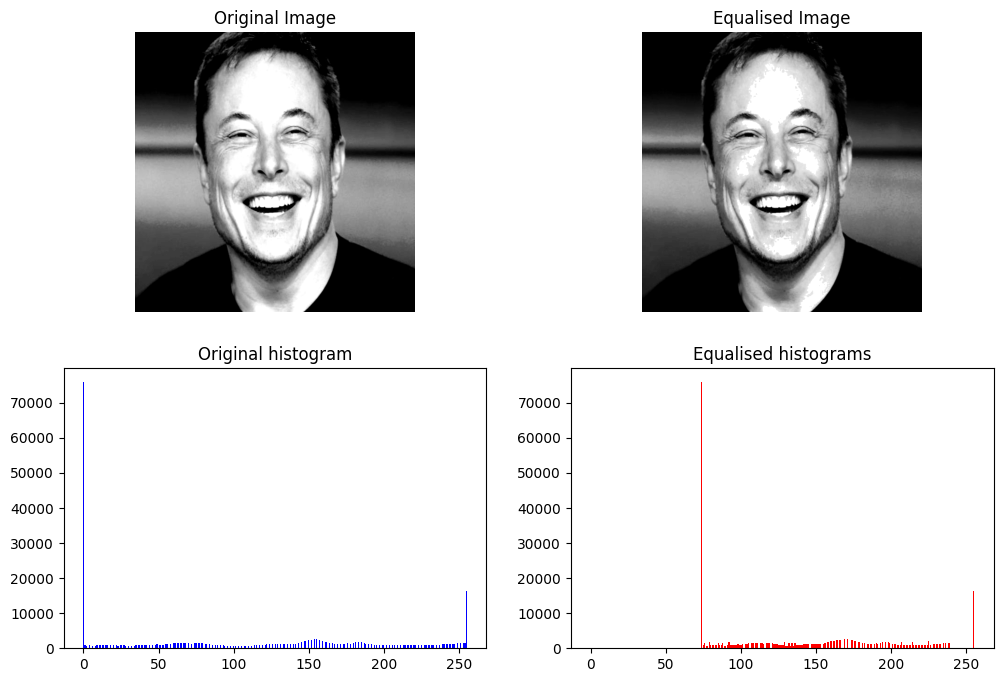

In [ ]:
cdf_musk = show_eqimg(img_musk)

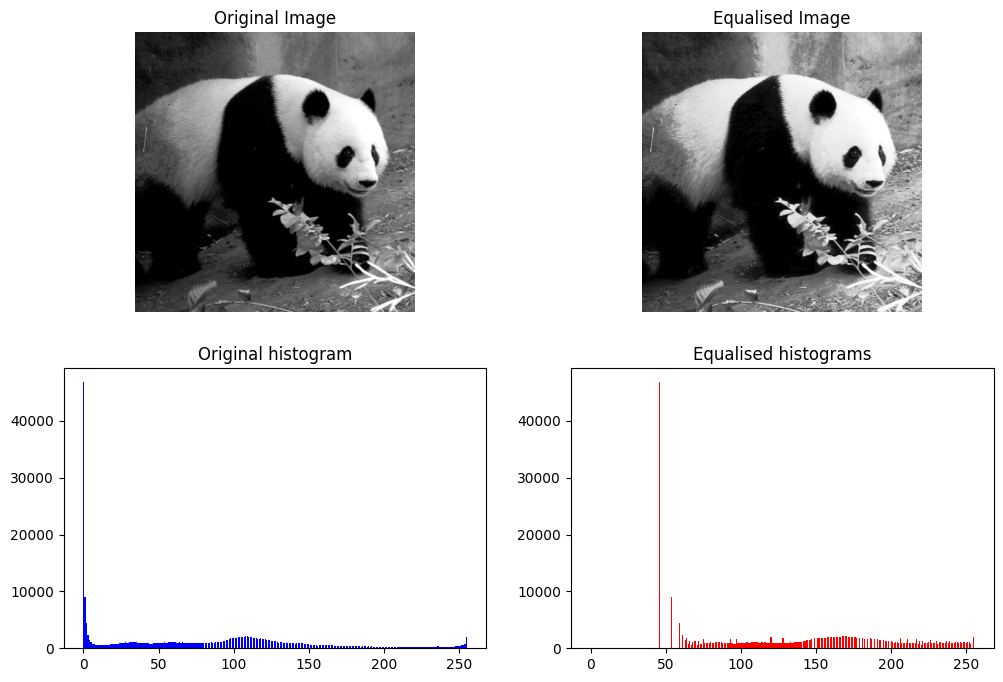

In [ ]:
cdf_panda = show_eqimg(img_panda)

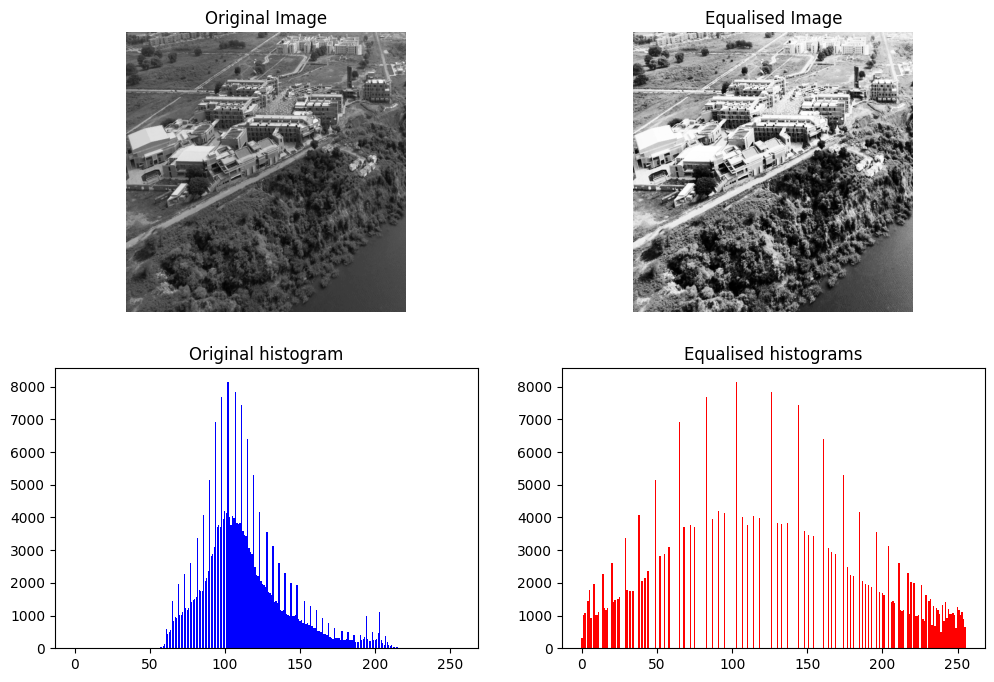

In [ ]:
cdf_town = show_eqimg(img_town)

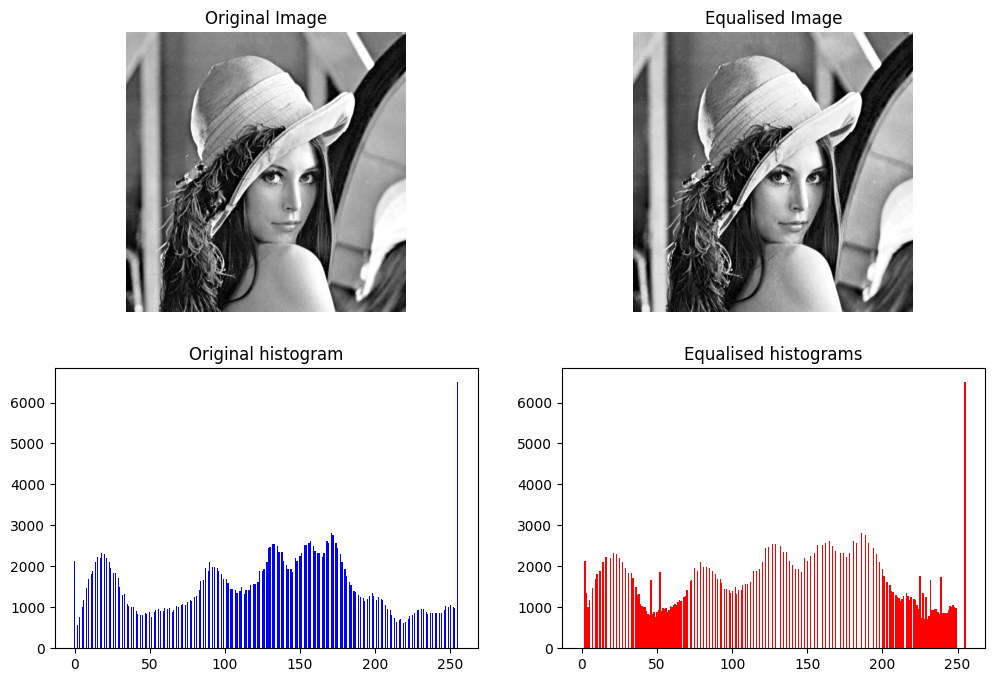

In [ ]:
cdf_woman = show_eqimg(img_woman)

MATCHING IMAGES

In [ ]:
def matchimg(e1, e2):
  j = 0
  matched = []
  for i in range(256):
    c2 = -2
    c1 = -1
    while c2<=c1 and j<255:
      c1 = abs(e1[i]-e2[j])
      c2 = abs(e1[i]-e2[j+1])
      j+=1
    else:
      j-=1
      if c1<c2:
        matched.append(ints[j])
      else:
        matched.append(ints[j+1])
  return matched

pan_wom = dict(zip(ints, matchimg(cdf_panda, cdf_woman)))
mus_tow = dict(zip(ints, matchimg(cdf_musk, cdf_town)))
wom_mus = dict(zip(ints, matchimg(cdf_woman, cdf_musk)))
tow_pan = dict(zip(ints, matchimg(cdf_town, cdf_panda)))

CREATING FINAL MATCHED IMAGES

In [ ]:
def dict_res(dictionary, image):
  z = image.flatten()
  for i in range(image.shape[0]*image.shape[1]):
    z[i] = dictionary[z[i]]
  new_im = z.reshape(image.shape[0],image.shape[1])
  return new_im

pan_wom_new = dict_res(pan_wom, img_panda)
mus_tow_new = dict_res(mus_tow, img_musk)
wom_mus_new = dict_res(wom_mus, img_woman)
tow_pan_new = dict_res(tow_pan, img_town)

In [ ]:
def displ(img1, img2, new):
  figure, axes = plt.subplots(nrows=1,ncols=3,figsize=(12, 8))
  axes[0].imshow(img1, cmap = 'gray')
  axes[0].axis('off')
  axes[0].set_title('Source Image')
  axes[1].imshow(img2, cmap = 'gray')
  axes[1].axis('off')
  axes[1].set_title('Target Image')
  axes[2].imshow(new, cmap = 'gray')
  axes[2].axis('off')
  axes[2].set_title('Matched Image')
  plt.show()

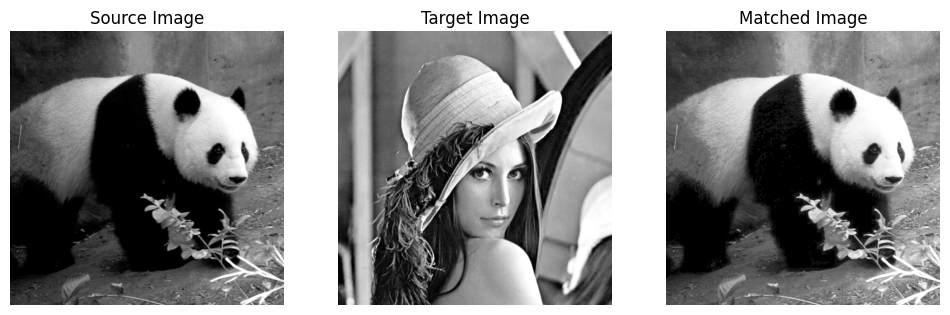

In [ ]:
displ(img_panda, img_woman, pan_wom_new)

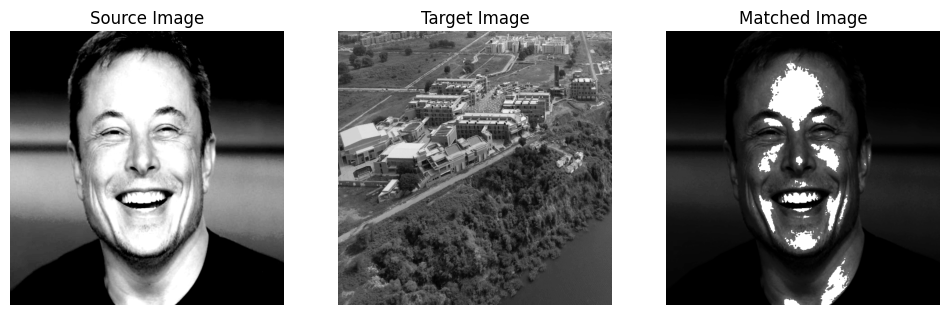

In [ ]:
displ(img_musk, img_town, mus_tow_new)

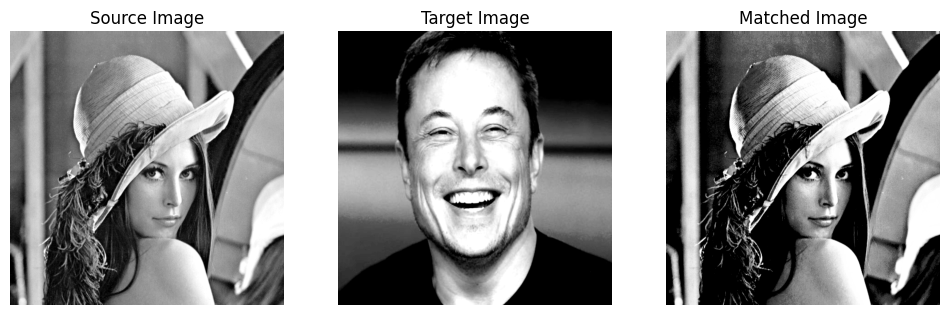

In [ ]:
displ(img_woman, img_musk, wom_mus_new)

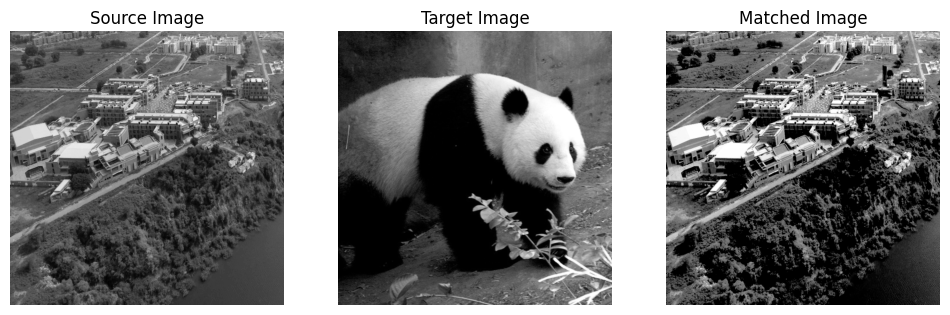

In [ ]:
displ(img_town, img_panda, tow_pan_new)

#REPORT

SOURCES

[1] "Read, Display and Write Images," *colab.research.google.com*, https://colab.research.google.com/drive/1qVdz2ClR9x2Ig7IezGSnw1K8qhBGRoGU?usp=sharing (accessed Mar. 02, 2024).

[2] N. Xiong, “Introduction to Image Processing in Python,” *colab.research.google.com*, Jul. 16, 2019. https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb (accessed Mar. 02, 2024).

[3] “OpenCV Python Program to analyze an image using Histogram,” *GeeksforGeeks*, Apr. 19, 2017. https://www.geeksforgeeks.org/opencv-python-program-analyze-image-using-histogram/ (accessed Mar. 02, 2024).

[4] “Hide histogram plot,” *Stack Overflow*. https://stackoverflow.com/questions/40647396/hide-histogram-plot (accessed Mar. 02, 2024).

PEERS DISCUSSED WITH

Pranav Thakkar 23110253

Hasan Ali 23110133

Prachand Aditya Prashant 23110250

Ginisha Garg 23110117